# <center>`Checking Assumptions of Linear Regression`</center>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [60]:
df = pd.read_csv("advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [61]:
X = df.drop(columns=['Unnamed: 0', 'sales'])
y = df['sales']

In [62]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

## Assumptions:

<b>1. Linear & Additive relation:</b>

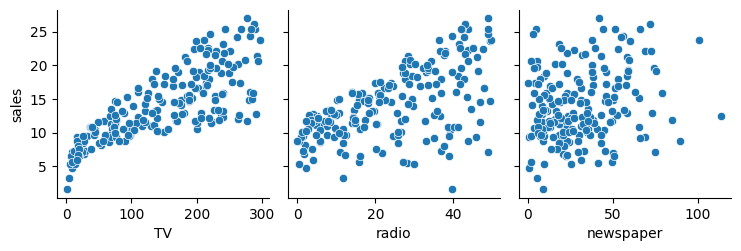

In [64]:
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales')
plt.show()

Clearly, Tv and radio have some kind of linear relationship with the target, but the same cannot be said with newspaper.

<b>2. Auto-correlation:</b>

In [65]:
predictions = lr.predict(X)
residuals = y - predictions

mean_residual = np.mean(residuals)

print("The mean residual is", mean_residual)

The mean residual is -6.039613253960852e-16


Mean residual is ~0, that means there is no correlation between the residuals.

<b>3. Homoscedasticity:</b>

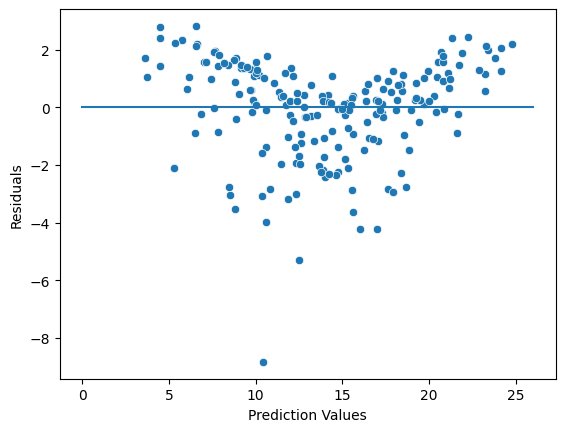

In [66]:
sns.scatterplot(x=predictions, y=residuals)
sns.lineplot(x=[0, 26], y=[0, 0])
plt.xlabel("Prediction Values")
plt.ylabel("Residuals")
plt.show()

Alternative method - Hypothesis test:  
<b>Gold Feld Quandt Test:</b>  
- Null -> Error terms are homoscedastic
- Alternate -> Error terms are heteroscedastic

In [67]:
lzip(['test-statistic', 'p-value', 'alternative'], sms.het_goldfeldquandt(residuals, X))

[('test-statistic', 1.344411032131835),
 ('p-value', 0.07338571632410192),
 ('alternative', 'increasing')]

Since, the p-value is greater than 0.05, Null Hypothesis follows.  
Therefore, the error values are homoscedastic.

<b>4. Multi-collinearity:</b>

Variance Inflation Factor (VIF):  
- if vif_score > 4 : Multi-collinearity in the dataset  
  then we drop the column which have got the highest vif score  
  and recalcuate the vif score.
  
- if vif_score <= 4: Multi-collinearity doesnt exist.

In [68]:
def vifScore(X):
    X = X.values
    
    vif_series = [vif(X, i) for i in range(X.shape[1])]
    
    vif_score = pd.DataFrame()
    vif_score['Features'] = df.drop(columns=['sales', 'Unnamed: 0']).columns
    vif_score['VIF Scores'] = vif_series
    
    return vif_score

In [69]:
vifScore(df.drop(columns=['sales', 'Unnamed: 0']))

,Features,VIF Scores
0,TV,2.486772
1,radio,3.285462
2,newspaper,3.055245


Since, the vif scores for each feature is less than 4, muti-collinearity doesnt exist.

<b>5. Normality of Error terms:</b>

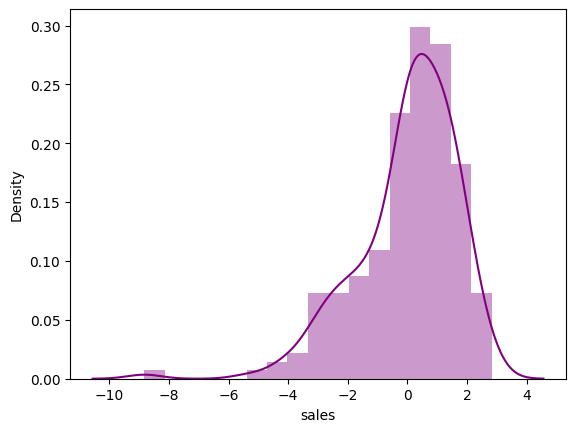

In [71]:
sns.distplot(a=residuals, color='purple')
plt.show()

The residual values are normally distributed if we ignore the outlier at the extreme left of the graph.